In [13]:
#imports
import random 
import numpy as np
import math
import matplotlib.pyplot as plt
import time  
from IPython.display import display, clear_output
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data

In [9]:
#professor code for plotting
def imscatter(x, y, image, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca()
    try:
        image = plt.imread(image)
    except TypeError:
        # Likely already an array...
        pass
    im = OffsetImage(image, zoom=zoom)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', \
                            frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists

In [14]:
#based on sheep class feel free to change the picture, and dimensions/roaming area
class bacteria():
    
    def __init__(self, x = random.randint(20,100),y = random.randint(20,120)):
        self.x = x
        self.y = y
        return
    
    def set_position(self):
        self.x = x
        self.y = y
        return
    
    def movement(self):
        randomstepx = random.randint(-2,2)
        randomstepy = random.randint(-2,2)
        self.x = self.x + randomstepx
        if self.x < 20:
            self.x = 20
        if self.x > 100:
            self.x = 100
        self.y = self.y + randomstepy
        if self.y < 20:
            self.y = 20
        if self.y > 120:
            self.y = 120
        return
    
    def reproduce(self):
        newbac = bacteria(self.x,self.y)
        return newbac
    
    def death(self):
        pass
    
    def draw(self):
        image_path = 'bacteria.jpg'
        imscatter(self.x, self.y, image_path, zoom=0.8)
        return

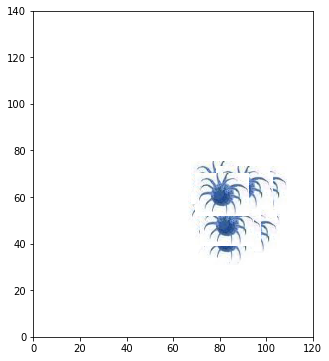

In [17]:
### also the professors code for testing, modified barely


#in this cell, run your roaming methoid 40 times

## initialize your sheep
b = bacteria()

## create an empty list of bacteria
allbac = []

## add bacteria to the list of bacteria
allbac.append(b)

## iterate over 50 time steps
for d in range(50):
  
    ## the next 2 lines are for plotting
    clear_output(wait=True)  
    plt.figure(figsize=(6, 6))    

    
    ## call the movement method and then draw  
    for ba in range(np.size(allbac)):
        allbac[ba].roaming()
        allbac[ba].draw()
        
     
    ## call the reproduce method every 10 time steps
    ## Here we assume sheep reproduce every 10 days
    if np.mod(d,10) == 1:
        ## call the reproduce method here
        for i in range(np.size(allbac)):
            cell = allbac[i].reproduce()
            allbac.append(cell)

    
    ## the next 5 lines are for plotting
    plt.axes().set_aspect('equal')
    plt.axes().set_xlim([-0,120])
    plt.axes().set_ylim([-0,140])
    plt.show()   
    time.sleep(0.001)  